## Available:
1. black list: wont change the black listed columns
2. early stopping
3. one hot encoded inputs
4. Correct Black list, now it is applied on the one_hot list not the input columns. 

## TODO:
1. The node labels are out of the figure

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(555)

import matplotlib.pyplot
plt.style.use('ggplot')

In [3]:
from alibi.utils.mapping import (
    ohe_to_ord as alibi_ohe_to_ord,
    ord_to_ohe as alibi_ord_to_ohe,
)

In [39]:
data = pd.read_csv('german_credit.csv')
y = data['default']
X_df = data.drop('default', axis=1)

cats = [X_df.dtypes.index[i] for i in range(X_df.shape[1]) if X_df.dtypes[i]=='object']
X_df = pd.get_dummies(X_df, columns=cats)

X = X_df.values
y = y.values

X_df.head()

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_.. >= 1000 DM,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_female : divorced/separated/married,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_if not A121 : building society savings agreement/ life insurance,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
0,6,1169,4,4,67,2,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1
1,48,5951,2,2,22,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
2,12,2096,2,3,49,1,2,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1
3,42,7882,2,4,45,1,2,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1
4,24,4870,3,4,53,2,2,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,1


In [41]:
clf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

# logistic = SGDClassifier(loss='log', penalty='l1', early_stopping=True,
#                          max_iter=10000, tol=1e-5, random_state=0)
# sca = MinMaxScaler()
# clf = Pipeline(steps=[('sca', sca), ('logistic', logistic)])
# clf.fit(X,y)
# clf.score(X,y)

0.7575

In [42]:
from ga_attack import plot_graph, create_onehot_map, GA_Counterfactual, alibi_ord_to_ohe, GAdvExample

In [43]:
feature_names = list(X_df.columns)

In [44]:
_, one_hot = create_onehot_map(feature_names, sep="_", min_dist=1, data=None)
one_hot

{7: 4,
 11: 5,
 16: 10,
 26: 5,
 31: 5,
 36: 4,
 40: 3,
 43: 4,
 47: 3,
 50: 3,
 53: 4,
 57: 2,
 59: 2}

In [45]:
data_ = alibi_ohe_to_ord(X_train, one_hot)[0]
data_.shape, X_train.shape

((600, 20), (600, 61))

In [46]:
np.quantile(data_[:,0], np.linspace(0,1,5))

array([ 4., 12., 18., 24., 60.])

In [47]:
np.where(clf.predict(X_train)!=y_train)

(array([], dtype=int64),)

In [48]:
idx_test = 31
ga = GAdvExample(feature_names=feature_names,
                sol_per_pop=30, num_parents_mating=15, cat_vars_ohe=one_hot,
                 num_generations=200, n_runs=10, black_list=None,
                 verbose=False, beta=.96)

x_all, x_changes, x_sucess = ga.attack(clf, x=X_train[idx_test,:],x_train=X_train)

100%|██████████| 10/10 [00:13<00:00,  1.34s/it]


In [49]:
ga.results

,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,account_check_status_>= 200 DM / salary assignments for at least 1 year,account_check_status_no checking account,credit_history_all credits at this bank paid back duly,credit_history_critical account/ other credits existing (not at this bank),credit_history_delay in paying off in the past,credit_history_existing credits paid back duly till now,credit_history_no credits taken/ all credits paid back duly,purpose_(vacation - does not exist?),purpose_business,purpose_car (new),purpose_car (used),purpose_domestic appliances,purpose_education,purpose_furniture/equipment,purpose_radio/television,purpose_repairs,purpose_retraining,savings_.. >= 1000 DM,savings_... < 100 DM,savings_100 <= ... < 500 DM,savings_500 <= ... < 1000 DM,savings_unknown/ no savings account,present_emp_since_.. >= 7 years,present_emp_since_... < 1 year,present_emp_since_1 <= ... < 4 years,present_emp_since_4 <= ... < 7 years,present_emp_since_unemployed,personal_status_sex_female : divorced/separated/married,personal_status_sex_male : divorced/separated,personal_status_sex_male : married/widowed,personal_status_sex_male : single,other_debtors_co-applicant,other_debtors_guarantor,other_debtors_none,property_if not A121 : building society savings agreement/ life insurance,"property_if not A121/A122 : car or other, not in attribute 6",property_real estate,property_unknown / no property,other_installment_plans_bank,other_installment_plans_none,other_installment_plans_stores,housing_for free,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes,P0,P1
0,6.000000,1374.000000,4.000000,3.000000,75.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.920000,0.080000
1,6.000000,1374.000000,4.000000,3.000000,75.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.360000,0.640000


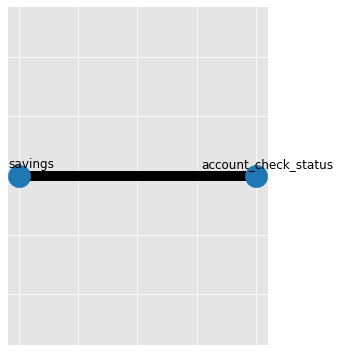

In [50]:
plot_graph(x_changes, 0)

# Example without one-hot

In [15]:
data = pd.read_csv('titanic.csv')
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [16]:
# from sklearn.datasets import load_breast_cancer
# X,y = load_breast_cancer(True)
# data = data.drop(['Name','Ticket','Cabin','Embarked','PassengerId'],axis=1)

data = data.drop(['Name'], axis=1)
data = data.dropna()
X_df = data.drop(['Survived'],axis=1)
y = data['Survived']

for d in X_df.columns[X_df.dtypes=='O']:
    le = LabelEncoder()    
    X_df[d] = le.fit_transform(X_df[d])
    print(d," .....   ",le.classes_)

X = X_df.values
y = y.values

Sex  .....    ['female' 'male']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [18]:
clf_titanic = RandomForestClassifier(n_estimators=10).fit(X_train, y_train)

In [19]:
idx_test = 0

ga_titanic = GAdvExample(feature_names=list(X_df.columns),
                sol_per_pop=30, num_parents_mating=10, cat_vars_ohe=None,
                 num_generations=100, n_runs=10, black_list=[],
                 verbose=False, beta=.95)

x_all, x_changes, x_sucess = ga_titanic.attack(clf_titanic, x=X_test[idx_test,:],x_train=X_train)

100%|██████████| 10/10 [00:01<00:00,  9.63it/s]


In [20]:
ga_titanic.results

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,P0,P1
0,3.000000,1.000000,24.500000,0.000000,0.000000,8.050000,1.000000,0.000000
1,3.000000,0.000000,24.500000,0.000000,0.000000,7.887500,0.000000,1.000000
2,3.000000,0.000000,24.500000,0.000000,0.000000,7.750000,0.000000,1.000000
4,3.000000,0.000000,24.500000,0.000000,0.000000,7.879200,0.000000,1.000000
6,3.000000,0.000000,24.500000,0.000000,0.000000,7.775000,0.000000,1.000000


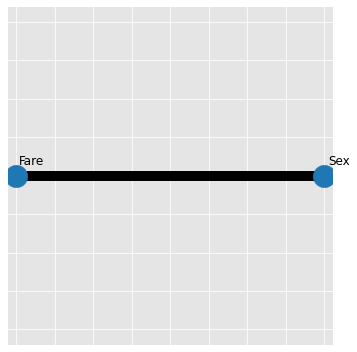

In [21]:
plot_graph(x_changes, 0)

In [22]:
x_changes

,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0.0,1.0,0.0,0.0,0.0,0.1625
1,0.0,1.0,0.0,0.0,0.0,0.3000
2,0.0,1.0,0.0,0.0,0.0,0.3000
3,0.0,1.0,0.0,0.0,0.0,0.1708
4,0.0,1.0,0.0,0.0,0.0,0.1708
5,0.0,1.0,0.0,0.0,0.0,0.2750
6,0.0,1.0,0.0,0.0,0.0,0.1708
7,0.0,1.0,0.0,0.0,0.0,0.3000
8,0.0,1.0,0.0,0.0,0.0,0.3000
9,0.0,1.0,0.0,0.0,0.0,0.2750


# IRIS

In [23]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

In [24]:
names = datasets.load_iris().feature_names

In [25]:
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
X_train = iris_X[indices[:-10]]
y_train = iris_y[indices[:-10]]
X_test = iris_X[indices[-10:]]
y_test = iris_y[indices[-10:]]

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [26]:
pd.crosstab(knn.predict(X_train),y_train)

col_0,0,1,2
row_0,,,
0,46,0,0
1,0,44,2
2,0,2,46


In [27]:
inds = np.where(knn.predict(X_train) !=y_train)
inds, y_train[inds]

((array([ 37,  48,  56, 132]),), array([1, 2, 2, 1]))

In [28]:
idx_test = 37

ga_iris = GAdvExample(feature_names=names, target=None,
                sol_per_pop=30, num_parents_mating=10, cat_vars_ohe=None,
                 num_generations=100, n_runs=10, black_list=[0,2],
                 verbose=False, beta=.95)

x_all, x_changes, x_sucess = ga_iris.attack(knn, x=X_train[idx_test,:],x_train=X_train)

100%|██████████| 10/10 [00:00<00:00, 103.34it/s]


In [29]:
ga_iris.results

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),P0,P1,P2
0,6.000000,2.700000,5.100000,1.600000,0.000000,0.200000,0.800000
1,6.000000,2.700000,5.100000,1.300000,0.000000,0.800000,0.200000
2,6.000000,2.700000,5.100000,1.000000,0.000000,0.800000,0.200000
4,6.000000,2.700000,5.100000,1.200000,0.000000,0.800000,0.200000
9,6.000000,2.700000,5.100000,1.400000,0.000000,0.800000,0.200000


In [30]:
plot_graph(x_changes, 0, False)

No edges exist!
